Suggested steps:
1. Data Exploration and Preprocessing  
3. Dataset Splitting  
4. Model Training  (you choose the algorithm)
5. Model Validation/Testing 
5. Conclusions

## Step 1: Data Exploration and Preprocessing

We will start by loading the dataset, exploring the data structure, and performing basic preprocessing steps such as:
- Handling missing values
- Encoding categorical variables
- Normalizing features if necessary

In [6]:
pip install pandas


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('/Users/fiona/Desktop/tech_test_unica/SingStar/data.csv')

# Mostrar las primeras filas
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
# Información básica y comprobación de los valores que faltan
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
# Elimina la columna 'id' y codifica 'diagnosis' (M = 1, B = 0)
df = df.drop(['id'], axis=1)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

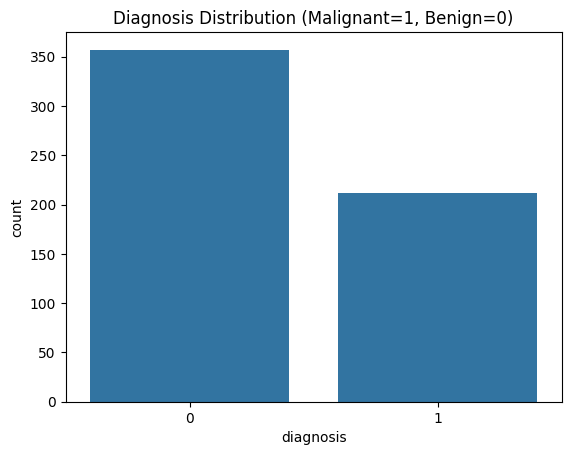

In [12]:
# Visualización de la distribución de clases
sns.countplot(x='diagnosis', data=df)
plt.title("Diagnosis Distribution (Malignant=1, Benign=0)")
plt.show()

## Step 2: Dataset Splitting

We'll split the dataset into training and testing sets using a 80/20 ratio.

In [13]:
pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
#from sklearn.model_selection import train_test_split

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Divide los datos X e y en conjuntos de entrenamiento y prueba, manteniendo la proporción de clases en y (estratificado) y usando un 30% para prueba.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y  
)

## Step 3: Model Training

We'll train a Random Forest Classifier on the dataset. This algorithm is robust, handles feature importance, and works well with this kind of structured data.

In [ ]:
#from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
#model = RandomForestClassifier(n_estimators=100, random_state=42)
#model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Modelo con más restricciones para evitar overfitting
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,              # Limita la profundidad de los árboles
    min_samples_split=10,     # Aumenta el número mínimo de muestras para dividir
    min_samples_leaf=5,       # Aumenta el número mínimo de muestras por hoja
    max_features='sqrt',      # Selecciona un subconjunto aleatorio de características
    random_state=42
)

# Entrenamiento
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Step 4: Model Validation/Testing

Now we evaluate the model using:
- Accuracy
- Confusion Matrix
- ROC Curve and AUC

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       107
           1       0.97      0.92      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



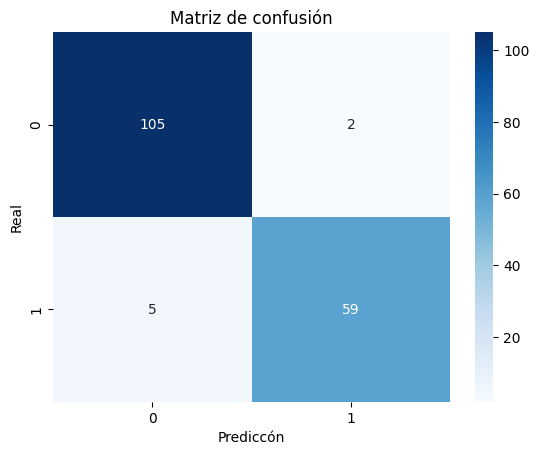

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Predicción en el conjunto de validación 
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Imprimir informe de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión")
plt.xlabel("Prediccón")
plt.ylabel("Real")
plt.show()

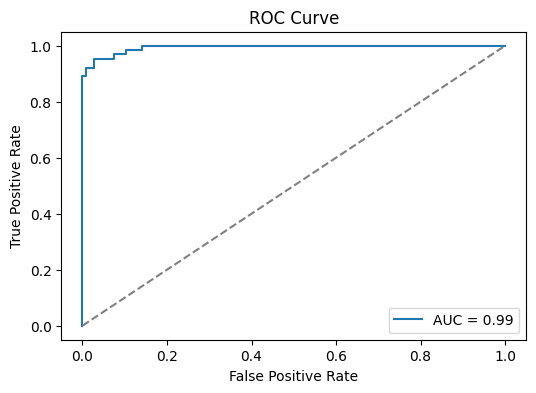

In [ ]:
# Curva ROC 
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Step 5: Conclusions

La curva ROC evalúa el desempeño del modelo comparando la tasa de verdaderos positivos (TPR) con la tasa de falsos positivos (FPR) al variar el umbral de clasificación. El AUC, que mide el área bajo esta curva, indica la capacidad del modelo para distinguir entre clases; un valor cercano a 1 refleja una excelente precisión.

En este caso, un AUC de 0.99 muestra que el modelo Random Forest discrimina de forma excelcente entre tumores malignos y benignos, con pocos errores en la clasificación. Esto indica un rendimiento alto y confiable, aunque es importante validar que no haya sobreajuste con técnicas adicionales como validación cruzada.